In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
import requests
import zipfile
import os

#Define input image shape
input_shape = (500, 500, 3)

#Download and extract data
import pathlib
url = "https://github.com/grace030524/AER850-Project-2/raw/refs/heads/main/Project%202%20Data.zip"
zip = './Project2Data.zip'
extract = './Project2Data'
response = requests.get(url)
with open(zip, 'wb') as file:
    file.write(response.content)
with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(extract)
os.remove(zip)

In [22]:
#Establish data directory
train_dir = os.path.join('./Project2Data/Data', 'train')
valid_dir = os.path.join('./Project2Data/Data', 'valid')


Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


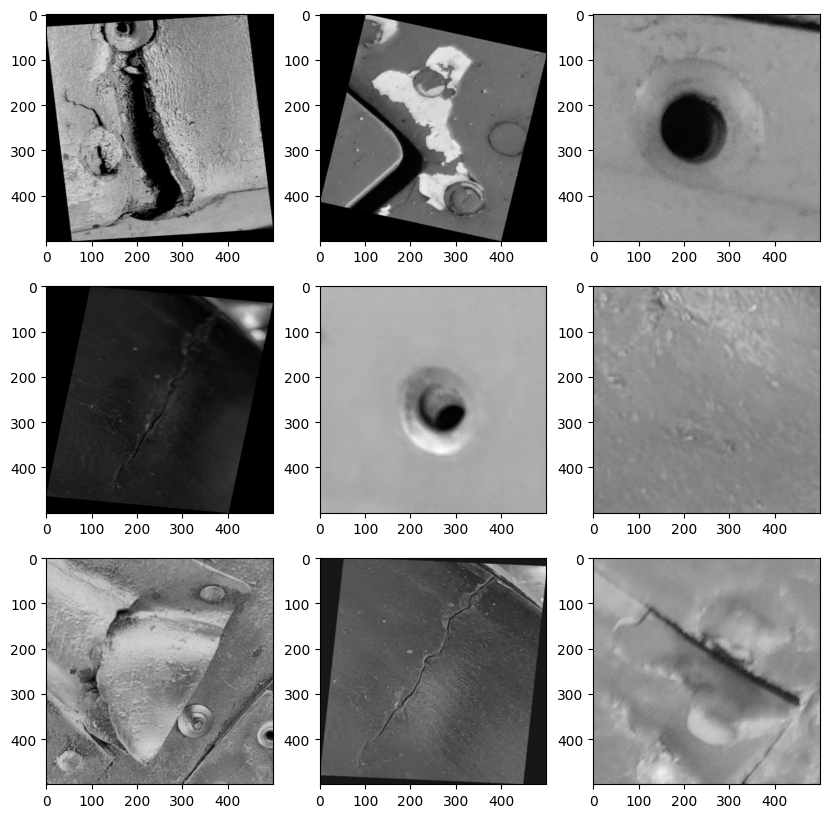

In [30]:
#Augmentation
train_aug = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomZoom(0.2),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])
valid_aug = tf.keras.Sequential([
    layers.Rescaling(1./255),
])
imagesize = (500,500)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=imagesize,
    color_mode="rgb",
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)
train_ds = train_data.map(lambda x, y: (train_aug(x, training=True), y))

valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=imagesize,
    color_mode="rgb",
    batch_size=32,
    label_mode='categorical',
    shuffle=True
)
valid_ds = valid_data.map(lambda x, y: (valid_aug(x, training=True), y))

#FOR TESTING WILL BE DELETED
import matplotlib.pyplot as plt

# Fetch a batch of augmented images
x_batch, y_batch = next(iter(valid_ds))

# Plot the augmented images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i])  # Show the image
    ax.axis('on')  # Remove axis

plt.show()